In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
acc = np.zeros((3,3,4))

In [4]:
acc[0,0,:] = np.loadtxt('kidney_acc.dat')
acc[0,1,:] = np.loadtxt('breastcancer_acc.dat')
acc[0,2,:] = np.loadtxt('diabetes_acc.dat')

In [5]:
acc[1,0,:] = np.loadtxt('diabetic_retinopathy_acc.dat')
acc[1,1,:] = np.loadtxt('orthopedics_acc.dat')
acc[1,2,:] = np.loadtxt('breasttissue_acc.dat')

acc[2,0,:] = np.loadtxt('protein_expression_acc.dat')
acc[2,1,:] = np.loadtxt('gene_acc.dat')
acc[2,2,:] = np.loadtxt('cardiotocography_acc.dat')
#acc[1,1,:] = np.loadtxt('drug_acc.txt')

In [6]:
acc *= 100

In [7]:
train_size = np.array([80,60,40,20])

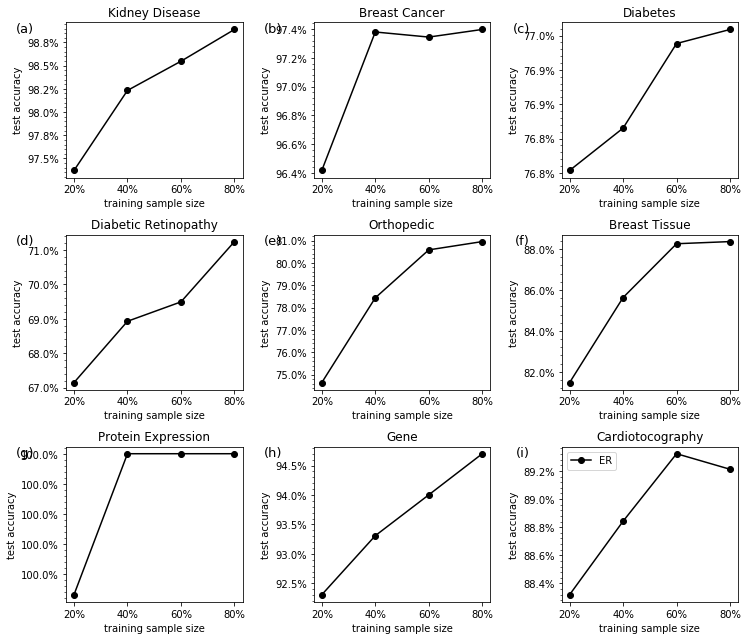

In [9]:
label = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','k','l']

nx = 3
ny = 3
nfig = nx*ny

fig, axes = plt.subplots(ny, nx,figsize=(nx*3.5,ny*3))

for i in range(ny):
    for j in range(nx):
        #axes[i,j].plot(train_size,acc[i,j,:,1],'k--',marker='o',mfc='none',label='LRnonCV')
        #axes[i,j].plot(train_size,acc[i,j,:,2],'b--',marker='s',mfc='none',label='LR')
        #axes[i,j].plot(train_size,acc[i,j,:,2],'r--',marker='^',mfc='none',label='Random Forest')
        axes[i,j].plot(train_size,acc[i,j,:],'k-',marker='o',label='ER')

        axes[i,j].set_xlabel('training sample size')
        axes[i,j].set_ylabel('test accuracy')
        axes[i,j].yaxis.set_minor_locator(mtick.AutoMinorLocator(5))
        axes[i,j].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
        axes[i,j].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f%%'))

#axes[0,2].set_yticks([74,75,76])
#axes[2,2].set_yticks([70,75,80,85])

axes[0,0].set_title('Kidney Disease')
axes[0,1].set_title('Breast Cancer')
axes[0,2].set_title('Diabetes')

axes[1,0].set_title('Diabetic Retinopathy')
axes[1,1].set_title('Orthopedic')
axes[1,2].set_title('Breast Tissue')

axes[2,0].set_title('Protein Expression')
axes[2,1].set_title('Gene')
axes[2,2].set_title('Cardiotocography')

axes[2,2].legend()

xlabel = np.full(nfig,-0.18)
ylabel = np.full(nfig,1.)
k = 0
for i in range(ny):
    for j in range(nx):        
        axes[i,j].text(xlabel[k],ylabel[k],label[k],transform=axes[i,j].transAxes,va='top',ha='right',fontsize=13)
        k += 1
       
fig.tight_layout(h_pad=1, w_pad=1.5)
plt.savefig('fig_ER.pdf', format='pdf', dpi=100)